# Sprawozdanie z laboratorium fizycznego 

## Ćwiczenie nr E10

Wyznaczanie krzywej ładowania kondensatora 

### Cel ćwiczenia

Celem ćwiczenia jest zbadanie przebiegu procesu ładowania kondensatora oraz  
wyznaczenie stałej czasowej szeregowego układu RC.

### Opis badanego zjawiska

Proces ładowania kondensatora w układzie RC (rezystor-kondensator) opisuje, jak kondensator gromadzi ładunek podczas podłączania do źródła prądu.  
Stała czasowa w takim układzie wyznacza, jak szybko kondensator się ładuje lub rozładowuje.

### Wzory i zależności

***τ = R⋅C***

gdzie:

- **R** to rezystancja w obwodzie (w ohmach),
- **C** to pojemność kondensatora (w faradach),
- **τ** to stała czasowa (w sekundach)

### Schemat układu pomiarowego

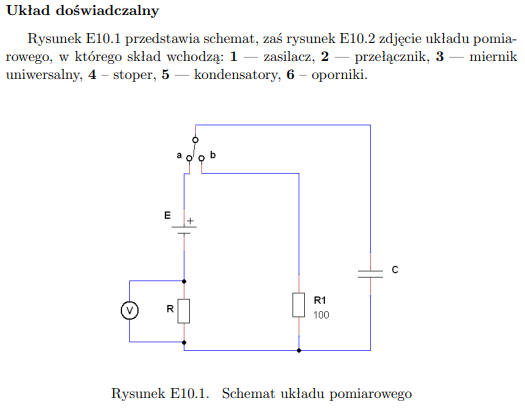

In [39]:
# Zaimportowanie potrzebnych modułów
import math

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Ścieżki do katalogu z danymi
TASK_1_PATH = 'data/task1'
TASK_2_PATH = 'data/task2'


# Funcja zwaracjąca ramkę DataFrame w zależności od podanego pliku CSV
def get_data_frame(file_name: str) -> pd.DataFrame:

    # Załadowanie danych z pliku CSV
    csv_data = pd.read_csv(f'{file_name}', sep=';')
    
    # Stowrzenie ramki danych 
    csv_df = pd.DataFrame(csv_data)

    # Zwrócenie gotowej ramki
    return csv_df


# Funkcja wyświetlająca wykres o zadanym tytule z zadanej ramki
def plot_from_df(title: str, df: pd.DataFrame) -> None:

    # Wybranie potrzebnej kolumny
    plt.plot(df['t'], df['v'])

    # Ustawienie etykiet osi
    plt.xlabel('czas [s]')
    plt.ylabel('napięcie [V]')
    plt.title(title)
    
    # Wyświetl wykres
    plt.show()


# Funkcja wyświetlająca dane z trzech ramek pomiarów na jednym wykresie
def plot_three_from_df(df1: pd.DataFrame, df2: pd.DataFrame, df3: pd.DataFrame) -> None:
    
    plt.plot(df1['t'], df1['v'], label='pomiar 1')
    plt.plot(df2['t'], df2['v'], label='pomiar 2')
    plt.plot(df3['t'], df3['v'], label='pomiar 3')
    
    # Adding labels and title
    plt.xlabel('czas [s]')
    plt.ylabel('napięcie [V]')
    plt.title('Trzy pomiary zmiany napięcia w czasie na jednym wykresie')
    
    # Display the legend
    plt.legend()
    
    # Show plot
    plt.grid(True)
    plt.show()

## Ćwiczenie E10.1

---

### Wykreślenie danych z pierwszego pomiaru

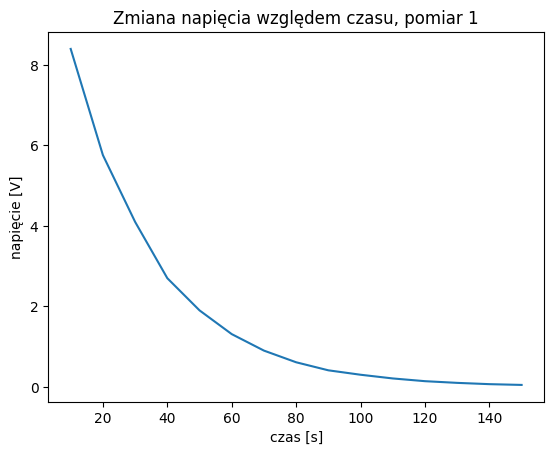

In [40]:
# Pobranie danych i utworzenie DataFrame
mesurement_1_1 = get_data_frame(f'{TASK_1_PATH}/data1.csv')

# Wyświetlenie wykresu
plot_from_df('Zmiana napięcia względem czasu, pomiar 1', mesurement_1_1)

### Wykreślenie danych z drugiego pomiaru

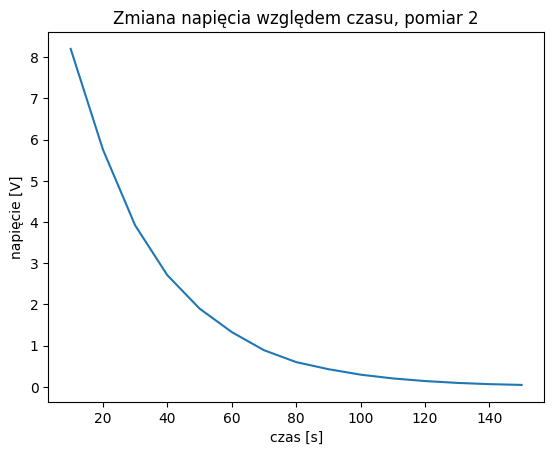

In [41]:
# Pobranie danych i utworzenie DataFrame
mesurement_1_2 = get_data_frame(f'{TASK_1_PATH}/data2.csv')

# Wyświetlenie wykresu
plot_from_df('Zmiana napięcia względem czasu, pomiar 2', mesurement_1_2)

### Wykreślenie danych z trzeciego pomiaru

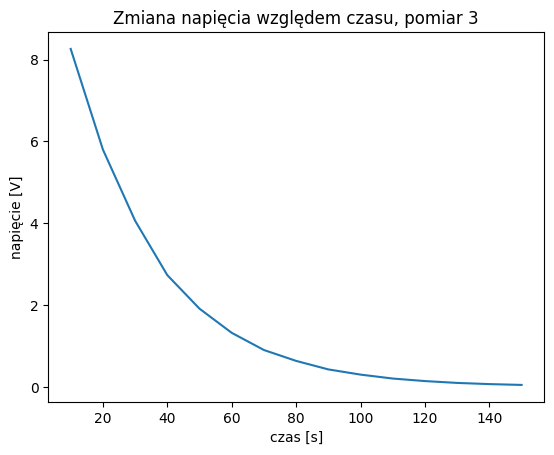

In [42]:
# Pobranie danych i utworzenie DataFrame
mesurement_1_3 = get_data_frame(f'{TASK_1_PATH}/data3.csv')

# Wyświetlenie wykresu
plot_from_df('Zmiana napięcia względem czasu, pomiar 3', mesurement_1_3)

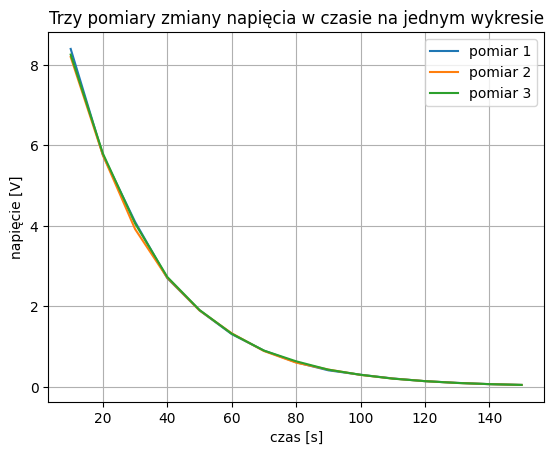

In [43]:
# Ponieważ trzy pomiary zostały wykonane w podobnych warunkach i ciężko jest dostrzec różnicę na osobnych wykresach, sprowadźmy wszystkie dane do jednego.

# Narysowanie wykresu z trzech pomiarów na raz
plot_three_from_df(mesurement_1_1, mesurement_1_2, mesurement_1_3)

### Komentarz

Trzy przeprowadzone pomiary są bardzo podobne do siebie, co oznacza, że zostały przeprowadzone w tych samych warunkach i w ten sam sposób.

## Ćwiczenie E10.2

---

### Wykreślenie danych z pierwszego pomiaru

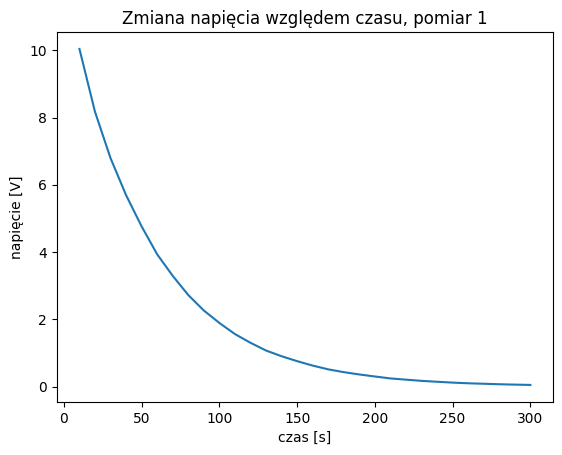

In [48]:
# Pobranie danych i utworzenie DataFrame
mesurement_2_1 = get_data_frame(f'{TASK_2_PATH}/data1.csv')

# Wyświetlenie wykresu
plot_from_df('Zmiana napięcia względem czasu, pomiar 1', mesurement_2_1)

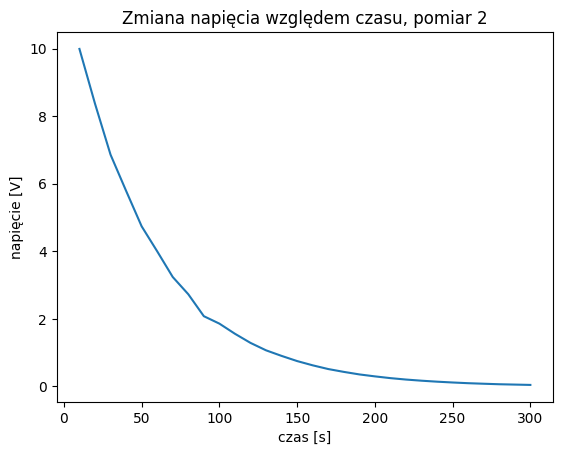

In [50]:
# Pobranie danych i utworzenie DataFrame
mesurement_2_2 = get_data_frame(f'{TASK_2_PATH}/data2.csv')

# Wyświetlenie wykresu
plot_from_df('Zmiana napięcia względem czasu, pomiar 2', mesurement_2_2)

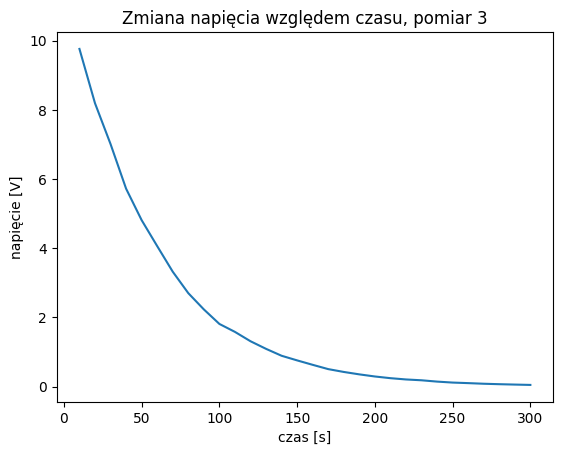

In [51]:
# Pobranie danych i utworzenie DataFrame
mesurement_2_3 = get_data_frame(f'{TASK_2_PATH}/data3.csv')

# Wyświetlenie wykresu
plot_from_df('Zmiana napięcia względem czasu, pomiar 3', mesurement_2_3)

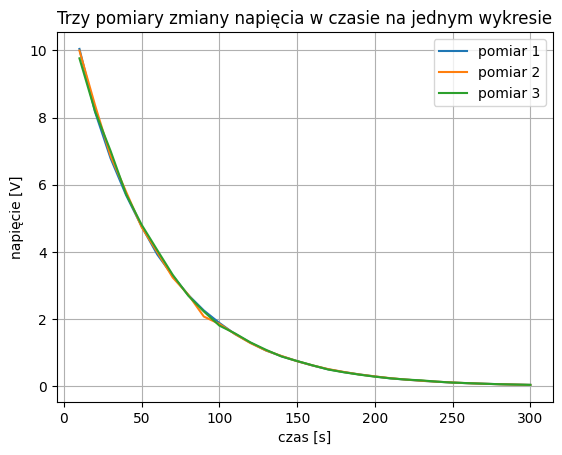

In [52]:
# Ponieważ trzy pomiary zostały wykonane w podobnych warunkach i ciężko jest dostrzec różnicę na osobnych wykresach, sprowadźmy wszystkie dane do jednego.

# Narysowanie wykresu z trzech pomiarów na raz
plot_three_from_df(mesurement_2_1, mesurement_2_2, mesurement_2_3)